In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

gd1=(Date>2008)&\
    (Date<2012)&\
    (Temp>-25)&\
    (Temp<30)
good1=np.where(gd1)[0]

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[good1],Temp[good1],s=5,c='g',alpha=0.9)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
plt.xlabel("Date (years)")
plt.ylabel("Temperature (C)")

popt, pcov = opt.curve_fit(cosfit, Date[good1], Temp[good1], p0=[10, 2*np.pi, np.pi/2, -10])
print ("the best function form is a cosine function and the best fit values are",*popt)
print(" the parameters are the amplitude (the change between winter and summer seasonal values), "\
      "is the period of the wave function, the shift needed to make the fit work with the temperatur data,"\
      "and finally how far the values are shifted from the middle point of 0 (munich never reaches below 0 celcius"\
      "which is why the data is not found about 0)")
ax1.plot(Date[good1], cosfit(Date[good1], *popt), c='r')
plt.show()

print("the mean temperature is", np.mean(Temp[good1]))
#summer temp from model is  the amplitude + the lifted height
print("the mean summer temp is", (popt[0])+popt[-1])
#winter temp from the model is the lifted height minus the amplitude
print("the mean winter temp is", popt[-1]-popt[0])

the best function form is a cosine function and the best fit values are 9.96074862467057 6.285028444450119 -0.7978482101580748 9.265673443303058
 the parameters are the amplitude (the change between winter and summer seasonal values), is the period of the wave function, the shift needed to make the fit work with the temperatur data,and finally how far the values are shifted from the middle point of 0 (munich never reaches below 0 celciuswhich is why the data is not found about 0)


<Figure size 2000x1500 with 1 Axes>

the mean temperature is 9.261252084167237
the mean summer temp is 19.22642206797363
the mean winter temp is -0.6950751813675122


ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

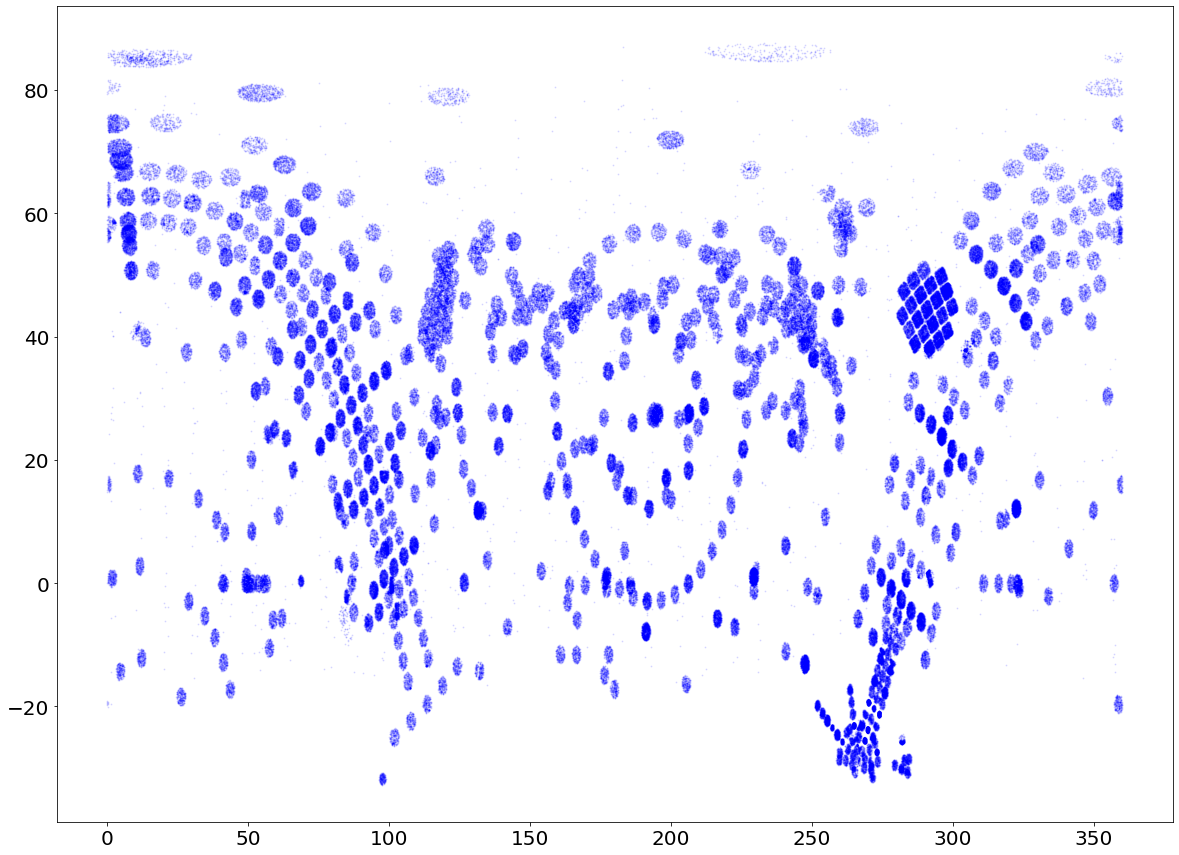

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

#will always apply these plus additional cuts
# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

#masking data with boolean array
# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

8.454337800671961 1.9555959756556884 2.2711306181719326 0.47829930950823674 0.004092885745061712 0.016208646747529504 0.010570371583162933 0.007874236560797571


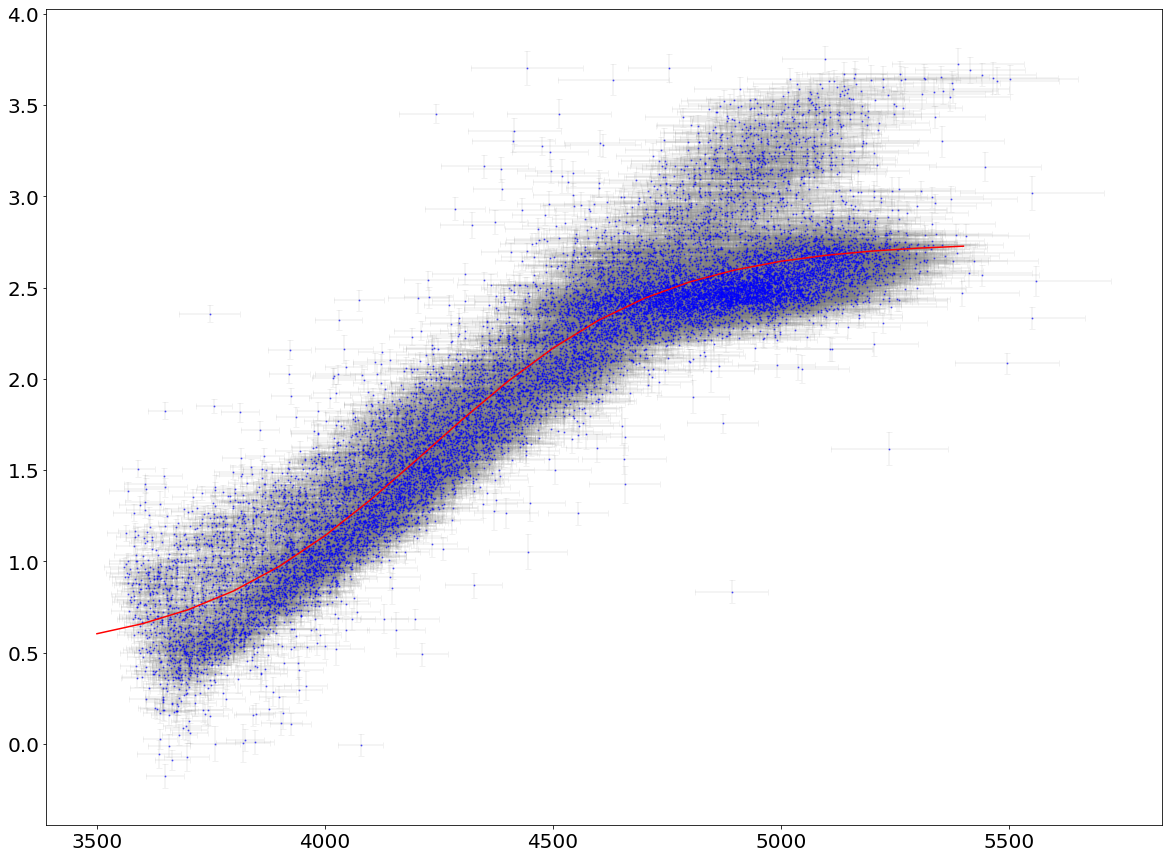

In [3]:
#masking data with boolean array
# Make a Boolena Mask to remove bad data
gda = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']>-1)&\
    (star['glat']<1)&\
    (star['teff']>-9999)&\
    (star['logg']>-9999)
gooda = np.where(gda)[0]
def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]
# To run example
#popt,pcov = mcFit(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

figa = plt.figure(figsize=(20,15))
axa = figa.add_subplot(111)
axa.scatter(star['teff'][gooda],star['logg'][gooda],s=1,c='b',alpha=0.5)
axa.errorbar(star['teff'][gooda],star['logg'][gooda], xerr=star['teff_err'][gooda],yerr=star['logg_ERR'][gooda], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axa.xaxis.set_tick_params(labelsize=20)
axa.yaxis.set_tick_params(labelsize=20)

xdata=np.arange(3500,5500,100)
popt, pcov = mcFit4param(sigmoid, star['teff'][gooda]/500, star['logg'][gooda], star['teff_err'][gooda]/500, star['logg_err'][gooda],[10,10,10,0.2])
print (*popt,*pcov)
axa.plot(xdata, sigmoid(xdata/500, *popt), c='r')

#if you removed the hook on the right, the graph could have a second population of approximately a linear line

-0.20231070709647483 0.050486903990442186 0.0008388075203245446 0.0002402872936788272
-0.19818388041954735 0.04576953084527356 0.001905064986788987 0.000437444475872632


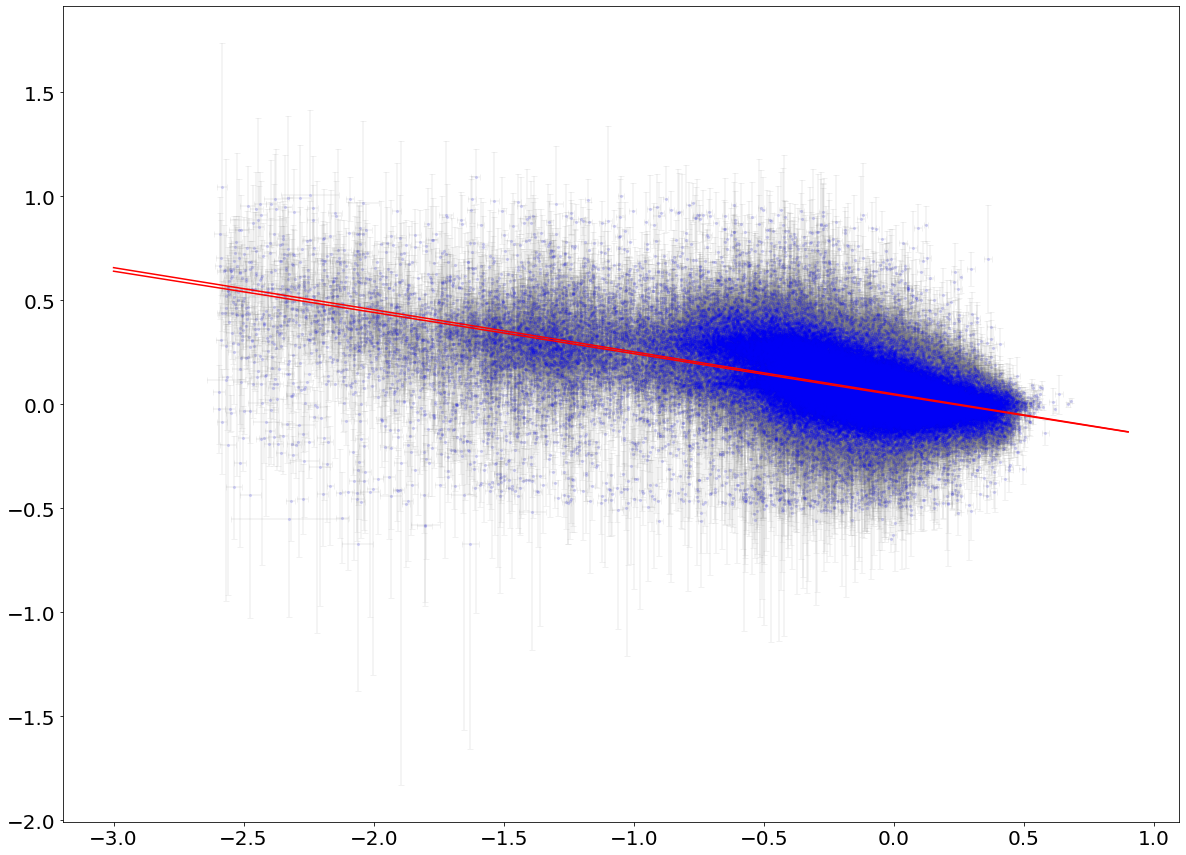

In [53]:
#masking data with boolean array
# Make a Boolena Mask to remove bad data
gdb1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']>10) &\
    (star['fe_h']>-9999)&\
    (star['o_fe']>-9999)
gdb2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']<-10) &\
    (star['fe_h']>-9999)&\
    (star['o_fe']>-9999)
goodb1 = np.where(gdb1)[0]
goodb2=np.where(gdb2)[0]
figb = plt.figure(figsize=(20,15))
axb = figb.add_subplot(111)
axb.scatter(star['fe_h'][goodb1],star['o_fe'][goodb1],s=5,c='b',alpha=0.1)
axb.scatter(star['fe_h'][goodb2],star['o_fe'][goodb2],s=5,c='b',alpha=0.1)
axb.errorbar(star['fe_h'][goodb1],star['o_fe'][goodb1], xerr=star['fe_h_err'][goodb1],yerr=star['o_fe_ERR'][goodb1], \
             c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axb.errorbar(star['fe_h'][goodb2],star['o_fe'][goodb2], xerr=star['fe_h_err'][goodb2],yerr=star['o_fe_ERR'][goodb2], \
             c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axb.xaxis.set_tick_params(labelsize=20)
axb.yaxis.set_tick_params(labelsize=20)

# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
#popt,pcov  = mcFit(data['X'], data['Y'], data['X_ERR'],data['Y_ERR'])

xdatb=np.arange(-3,1,0.1)
popt, pcov = mcFitLine(star['fe_h'][goodb1], star['o_fe'][goodb1], star['fe_h_err'][goodb1], star['o_fe_err'][goodb1])
#the linear fit was the best fit that I found
print (*popt,*pcov)
axb.plot(xdatb, linear(xdatb, *popt), c='r')
#popt, pcov = mcFitLine(star['fe_h'][goodb2], star['o_fe'][goodb2], star['fe_h_err'][goodb2], star['o_fe_err'][goodb2])
#the linear fit was the best fit that I found
#print (*popt,*pcov)
#axb.plot(xdatb, linear(xdatb, *popt), c='r')
#the goodb2 is nearly the same as goodb1 so i just did the goodb1, feel free to uncomment and run the above to see
plt.show()
#this graph could have a second population, essentially there is a big blob and if you cut through the center of the big
#blob than any fit could go through it

0.13833972982782125 0.2217566562880393 -0.11903474050857292 0.028402007472839066 0.008010934621122482 0.005693672453516001 0.001437366334198753 0.0004359862478720657


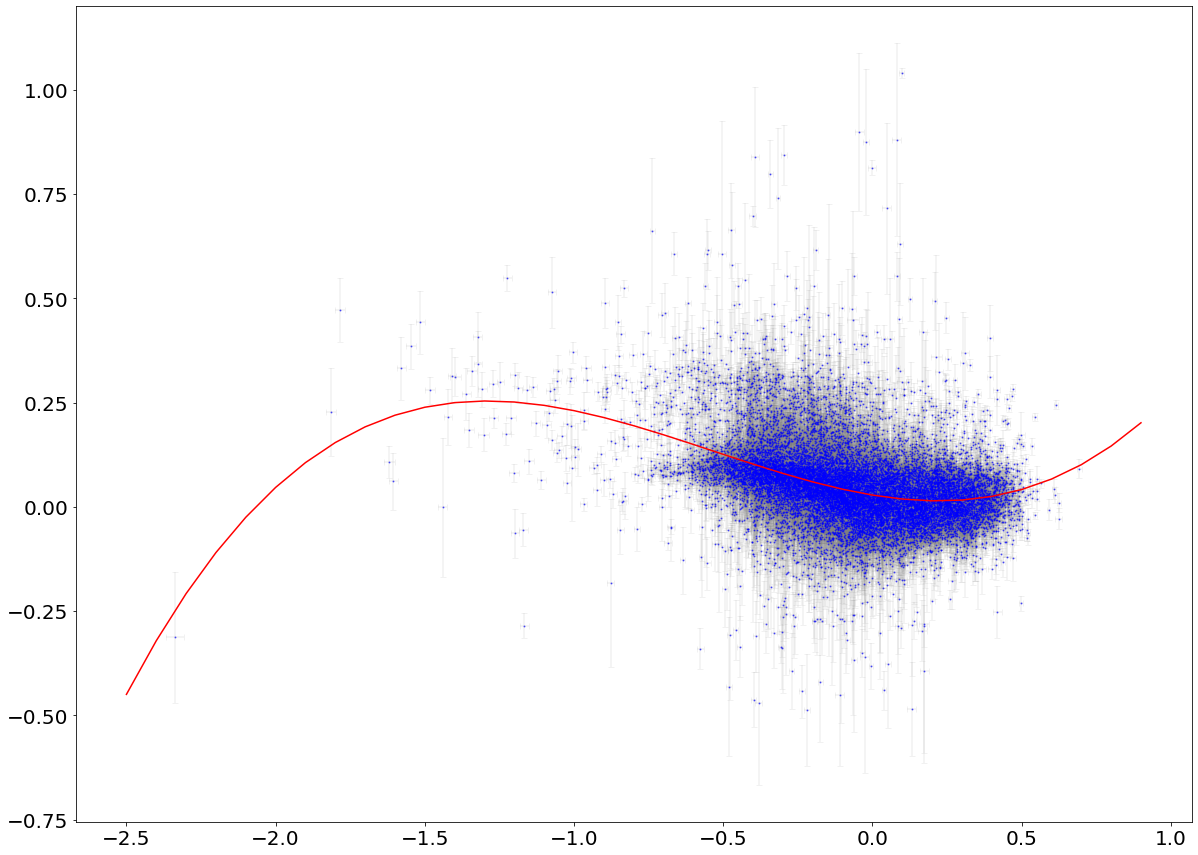

In [5]:
gdc = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']>-1)&\
    (star['glat']<1)&\
    (star['fe_h']>-9999)&\
    (star['o_fe']>-9999)
goodc = np.where(gdc)[0]

figc = plt.figure(figsize=(20,15))
axc = figc.add_subplot(111)
axc.scatter(star['fe_h'][goodc],star['o_fe'][goodc],s=1,c='b',alpha=0.5)
axc.errorbar(star['fe_h'][goodc],star['o_fe'][goodc], xerr=star['fe_h_err'][goodc],yerr=star['o_fe_err'][goodc], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axc.xaxis.set_tick_params(labelsize=20)
axc.yaxis.set_tick_params(labelsize=20)

def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]
# To run example
#popt,pcov = mcFit(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

xdatc=np.arange(-2.5,1,0.1)
popt, pcov = mcFit4param(poly3, star['fe_h'][goodc], star['o_fe'][goodc], star['fe_h_err'][goodc], star['o_fe_err'][goodc], [10,10,10,10])
print (*popt,*pcov)
#almost all the fits were nearly the same, but i thought this one looked prettier
axc.plot(xdatc, poly3(xdatc, *popt), c='r')
plt.show()
#this fit could have many many second population fits, this just depends on preference of the fit, i chose the pretty fit
#but essentially any fit that cuts through the middle would work

3.35376516523635e-08 -0.0006258868025700534 2.8756816594071597 2.2853523414849357e-10 2.418080915324318e-06 0.006315967755096636
3.71060236266416e-08 -0.0006894781038172058 3.1765146203443475 4.816342174116369e-10 5.108559204402079e-06 0.013312739643406256


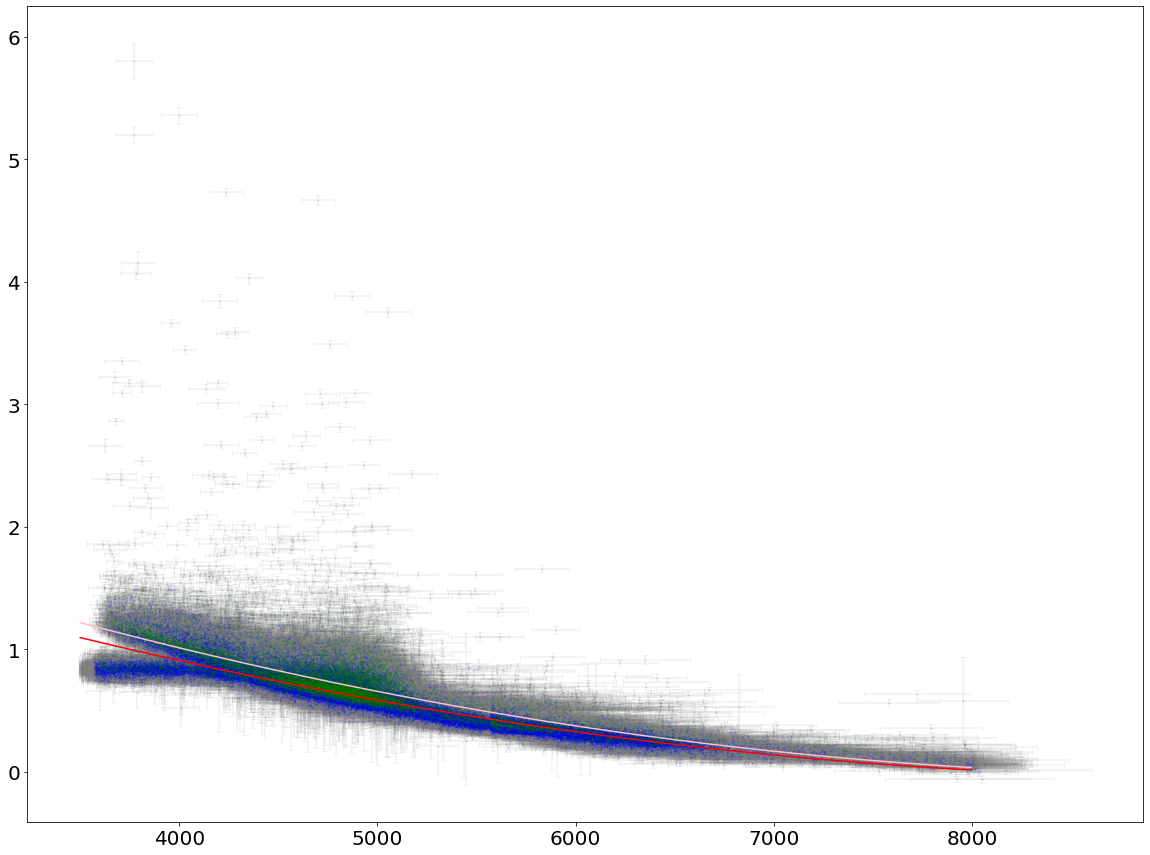

In [56]:
#masking data with boolean array
# Make a Boolena Mask to remove bad data
star_j_k= (star['j']-star['k'])
star_j_k_err= (star['j_err']**2+ star['k_err']**2)**(1/2)
gdd1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']>10) &\
    (star['teff']>-9999)&\
    (star_j_k>-9999)&\
    (star_j_k_err>-5)&\
    (star_j_k_err<5)
gdd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']<-10) &\
    (star['teff']>-9999)&\
    (star_j_k>-9999)&\
    (star_j_k_err>-5)&\
    (star_j_k_err<5)
goodd1 = np.where(gdd1)[0]
goodd2=np.where(gdd2)[0]
figd = plt.figure(figsize=(20,15))
axd = figd.add_subplot(111)
axd.scatter(star['teff'][goodd1],star_j_k[goodd1],s=1,c='b',alpha=0.1)
axd.scatter(star['teff'][goodd2],star_j_k[goodd2],s=1,c='b',alpha=0.1)
axd.errorbar(star['teff'][goodd1],star_j_k[goodd1], xerr=star['teff_err'][goodd1],yerr=star_j_k_err[goodd1], \
             c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axd.errorbar(star['teff'][goodd2],star_j_k[goodd2], xerr=star['teff_err'][goodd2],yerr=star_j_k_err[goodd2], \
             c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axd.xaxis.set_tick_params(labelsize=20)
axd.yaxis.set_tick_params(labelsize=20)

def mcFit3param(function, xx, yy, xx_err, yy_err, guess):
    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y

        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])
    
    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]
#xdatd=np.arange(3500,8000,1)
#popt, pcov = opt.curve_fit(poly2, star['teff'][goodd1], star_j_k[goodd1])
#print( *popt, *pcov)
#axd.plot(xdatd, poly2(xdatd, *popt), c='r')

#To run example
#popt,pcov = mcFit(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

xdatd=np.arange(3500,8000,1)
popt, pcov = mcFit3param(poly2, star['teff'][goodd1], star_j_k[goodd1],star['teff_err'][goodd1], star_j_k_err[goodd1],[0, 0, 5])
#because there is a bifurcation split, that means that the beginning of this fit will be between the two slices. 
print (*popt,*pcov)
axd.plot(xdatd, poly2(xdatd, *popt), c='r')
#plt.show()
#popt, pcov = mcFit3param(poly2, star['teff'][goodd2], star_j_k[goodd2],star['teff_err'][goodd2], star_j_k_err[goodd2],[0, 0, 5])
#print (*popt,*pcov)
#axd.plot(xdatd, poly2(xdatd, *popt), c='r')
#if you graph based on goodd2, the line shifts into the top bifurcation piece, this is because of where that data is sitting
#however I did not believe it to best fit all the data so I kept the goodd1 data, but feel free to look, 
#also change the goodd2 data to a green color to see better
#plt.show()
#this guy has a bifurcation, so there is a second population that could maybe be a sigmoid or a flatter line than a poly
#it does exist, it just depends on the preference to exactness of the graph

-49.90463695486182 0.032219276680074314 -3.7012804794865315 -15.432973645119754 0.0011446337731734685 5.657858447472069e-07 9.705078142125438e-05 0.001137671829185935


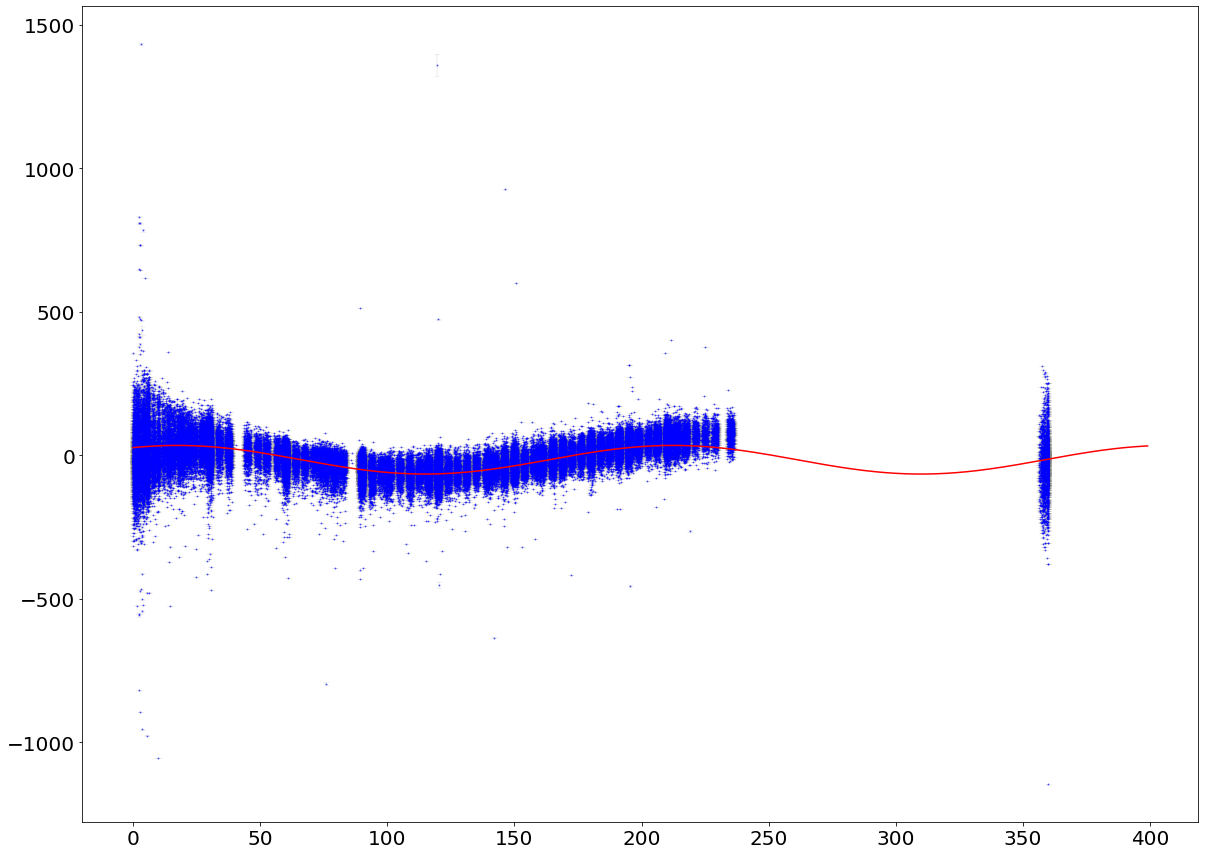

In [7]:
gde = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['glat']>-10)&\
    (star['glat']<10)&\
    (star['glon']>-9999)&\
    (star['vhelio_avg']>-9999)
goode = np.where(gde)[0]

fige = plt.figure(figsize=(20,15))
axe = fige.add_subplot(111)
axe.scatter(star['glon'][goode],star['vhelio_avg'][goode],s=1,c='b',alpha=0.5)
#fix yerr name
axe.errorbar(star['glon'][goode],star['vhelio_avg'][goode],yerr=star['verr'][goode], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axe.xaxis.set_tick_params(labelsize=20)
axe.yaxis.set_tick_params(labelsize=20)

def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]
# To run example
#popt,pcov = mcFit(cosfit, data['X'], data['Y'], data['X_ERR'],data['Y_ERR'], p0)

xdate=np.arange(0,400,1)
popt, pcov = mcFit4param(cosfit, star['glon'][goode], star['vhelio_avg'][goode],8.3e-5,star['verr'][goode],[-10, np.pi/200, 0, 0])
#working on figuring out the last two params tried -5e-3, 1e-4; 200, 200;  
print (*popt,*pcov)
axe.plot(xdate, cosfit(xdate, *popt), c='r')
plt.show()
#this plot could maybe be fit with a poly 3 curve but there doesnt appear to be a second population

0.0645711539578831 0.19639779497263934 9.435846766176183e-05 0.0007474325904285165


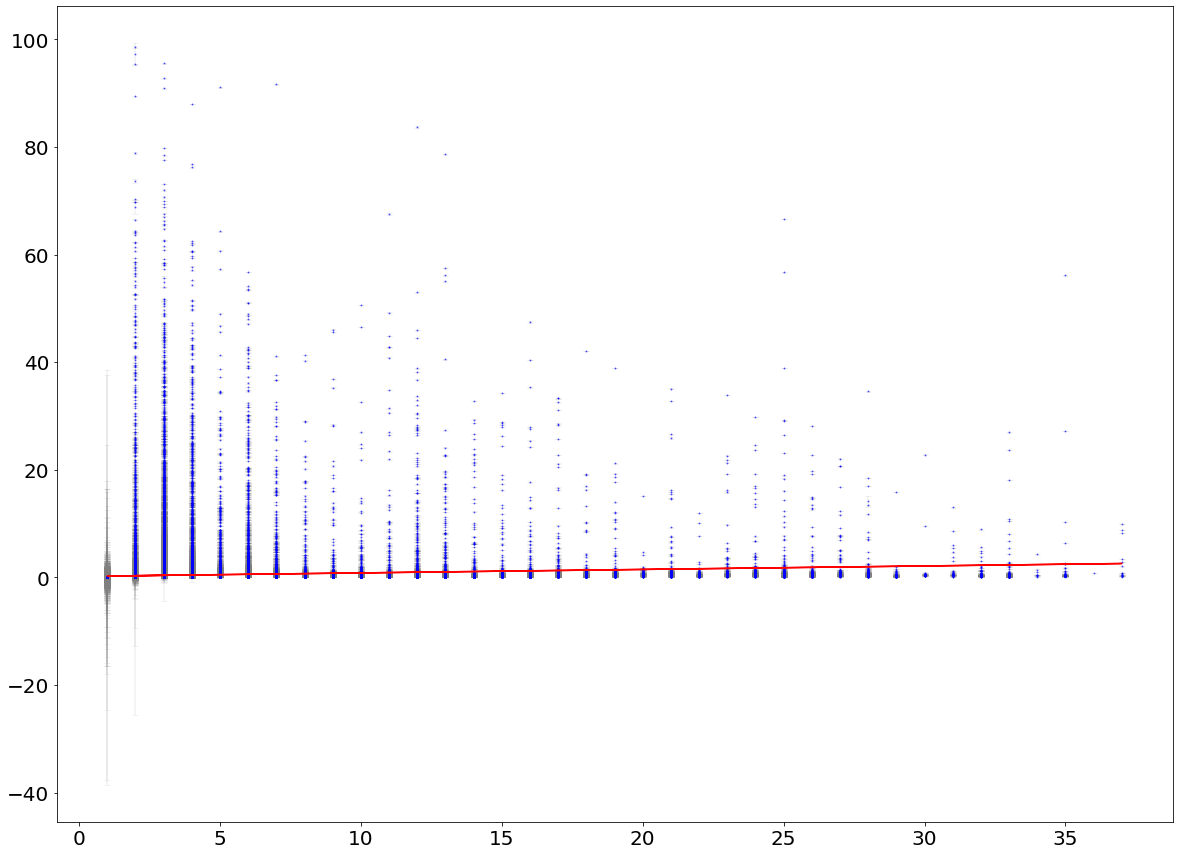

In [52]:
gdf = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['nvisits']>-9999)&\
    (star['vscatter']>-9999)&\
    (star['vscatter']<100)&\
    (star['verr']<50)
goodf = np.where(gdf)[0]

figf = plt.figure(figsize=(20,15))
axf = figf.add_subplot(111)
axf.scatter(star['nvisits'][goodf],star['vscatter'][goodf],s=1,c='b',alpha=0.5)
axf.errorbar(star['nvisits'][goodf],star['vscatter'][goodf],yerr=star['verr'][goodf], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axf.xaxis.set_tick_params(labelsize=20)
axf.yaxis.set_tick_params(labelsize=20)

def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
#popt,pcov  = mcFit(data['X'], data['Y'], data['X_ERR'],data['Y_ERR'])

popt, pcov = mcFitLine(star['nvisits'][goodf], star['vscatter'][goodf], 0 , star['verr'][goodf])
print( *popt, *pcov)
axf.plot(star['nvisits'][goodf], linear(star['nvisits'][goodf], *popt), c='r')
#this plot is interesting because the x-axis is intengers. 
#Poly2 seemed to work decently on this fit as well, but when I zoomed into 0 to 10 of nvisits the poly 2 wouldnt work 
#which is why I decided to keep the linear fit instead

-0.021125485264858038 0.01823231983653389 [2.77185217e-08 4.12486502e-09] [4.12486502e-09 4.05755235e-09]


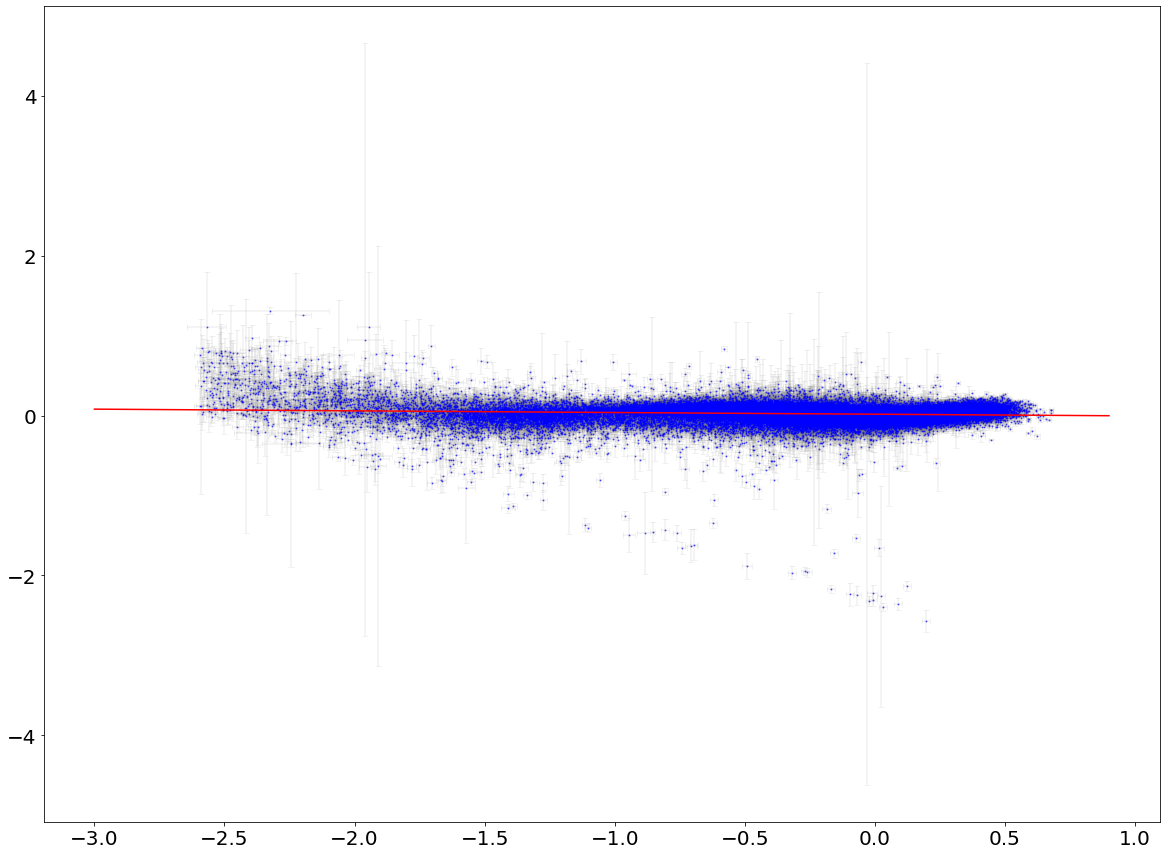

In [49]:
gdg = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)&\
    (star['fe_h']>-9999)&\
    (star['ni_fe']>-9999)&\
    (star['verr']<5)
goodg = np.where(gdg)[0]

figg = plt.figure(figsize=(20,15))
axg = figg.add_subplot(111)
axg.scatter(star['fe_h'][goodg],star['ni_fe'][goodg],s=1,c='b',alpha=0.5)
axg.errorbar(star['fe_h'][goodg],star['ni_fe'][goodg],xerr=star['fe_h_err'][goodg],yerr=star['ni_fe_err'][goodg], c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0, alpha=0.1)
axg.xaxis.set_tick_params(labelsize=20)
axg.yaxis.set_tick_params(labelsize=20)

def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

# To run example
#popt,pcov  = mcFit(data['X'], data['Y'], data['X_ERR'],data['Y_ERR'])

xdatg=np.arange(-3,1,.1)
popt, pcov = mcFitLine(linear, star['fe_h'][goodg], star['ni_fe'][goodg], star['fe_h_err'][goodg], star['ni_fe_err'][goodg])  
print (*popt,*pcov)
axg.plot(xdatg, linear(xdatg, *popt), c='r')
plt.show()
#a second population could exist here, it depends on what ever fit you would like to cut through the middle of the data
#for me I felt the linear fit fit really good e-08 or better.